In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("telecom_churn.csv")

In [8]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [9]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


DataUsage, DayMins, DayCalls, RoaMmins - Could be behavioral indicators

MonthlyCharge, OverageFees - Cost-related factors

CustServCalls - Could be a strong predictor (as high calls could mean issues/frustration)
AccountWeeks - Could be a loyalty indicator

ContractRenewal, DataPlan - Shows the commitment level

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [11]:
df.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.corr()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,1.000000,0.016541,-0.259852,-0.102148,-0.087195,0.208750,0.205151,0.018459,0.072313,0.092812,0.068239
AccountWeeks,0.016541,1.000000,-0.024735,0.002918,0.014391,-0.003796,0.006216,0.038470,0.012581,-0.006749,0.009514
ContractRenewal,-0.259852,-0.024735,1.000000,-0.006006,-0.019223,0.024522,-0.049396,-0.003755,-0.047291,-0.019105,-0.045871
DataPlan,-0.102148,0.002918,-0.006006,1.000000,0.945982,-0.017824,-0.001684,-0.011086,0.737490,0.021526,-0.001318
DataUsage,-0.087195,0.014391,-0.019223,0.945982,1.000000,-0.021723,0.003176,-0.007962,0.781660,0.019637,0.162746
CustServCalls,0.208750,-0.003796,0.024522,-0.017824,-0.021723,1.000000,-0.013423,-0.018942,-0.028017,-0.012964,-0.009640
DayMins,0.205151,0.006216,-0.049396,-0.001684,0.003176,-0.013423,1.000000,0.006750,0.567968,0.007038,-0.010155
DayCalls,0.018459,0.038470,-0.003755,-0.011086,-0.007962,-0.018942,0.006750,1.000000,-0.007963,-0.021449,0.021565
MonthlyCharge,0.072313,0.012581,-0.047291,0.737490,0.781660,-0.028017,0.567968,-0.007963,1.000000,0.281766,0.117433
OverageFee,0.092812,-0.006749,-0.019105,0.021526,0.019637,-0.012964,0.007038,-0.021449,0.281766,1.000000,-0.011023


In [15]:
df["Churn"].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

In [22]:
df["DataUsage"].describe()

count    3333.000000
mean        0.816475
std         1.272668
min         0.000000
25%         0.000000
50%         0.000000
75%         1.780000
max         5.400000
Name: DataUsage, dtype: float64

In [23]:
df["CustServCalls"].describe()

count    3333.000000
mean        1.562856
std         1.315491
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: CustServCalls, dtype: float64

Adding new Columns

In [24]:
df["usage_per_week"]=df["DataUsage"]/df["AccountWeeks"]
df["calls_per_week"]=df["DayCalls"]/df["AccountWeeks"]
df["revenue_per_week"]=df["MonthlyCharge"]/df["AccountWeeks"]

In [28]:
df["high_data_usage"] = (df["DataUsage"]>1.78).astype(int)

In [29]:
df["high_service_calls"]=(df["CustServCalls"]>2).astype(int)

In [30]:
cols = ["usage_per_week","calls_per_week","revenue_per_week","high_data_usage","high_service_calls","Churn"]
df[cols].corr()["Churn"].sort_values(ascending=False)

Churn                 1.000000
high_service_calls    0.170142
revenue_per_week     -0.005414
calls_per_week       -0.006872
usage_per_week       -0.033387
high_data_usage      -0.095154
Name: Churn, dtype: float64

In [32]:
df.corr()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,usage_per_week,calls_per_week,revenue_per_week,high_data_usage,high_service_calls
Churn,1.000000,0.016541,-0.259852,-0.102148,-0.087195,0.208750,0.205151,0.018459,0.072313,0.092812,0.068239,-0.033387,-0.006872,-0.005414,-0.095154,0.170142
AccountWeeks,0.016541,1.000000,-0.024735,0.002918,0.014391,-0.003796,0.006216,0.038470,0.012581,-0.006749,0.009514,-0.160065,-0.286701,-0.282297,0.012079,0.007154
ContractRenewal,-0.259852,-0.024735,1.000000,-0.006006,-0.019223,0.024522,-0.049396,-0.003755,-0.047291,-0.019105,-0.045871,0.010951,0.011454,0.007453,-0.013051,0.003616
DataPlan,-0.102148,0.002918,-0.006006,1.000000,0.945982,-0.017824,-0.001684,-0.011086,0.737490,0.021526,-0.001318,0.244291,0.008041,0.073843,0.931197,-0.037182
DataUsage,-0.087195,0.014391,-0.019223,0.945982,1.000000,-0.021723,0.003176,-0.007962,0.781660,0.019637,0.162746,0.244968,0.001650,0.068385,0.949049,-0.043626
CustServCalls,0.208750,-0.003796,0.024522,-0.017824,-0.021723,1.000000,-0.013423,-0.018942,-0.028017,-0.012964,-0.009640,-0.018641,-0.003080,-0.010063,-0.018024,0.798168
DayMins,0.205151,0.006216,-0.049396,-0.001684,0.003176,-0.013423,1.000000,0.006750,0.567968,0.007038,-0.010155,-0.011118,-0.012232,0.029158,0.013505,0.016742
DayCalls,0.018459,0.038470,-0.003755,-0.011086,-0.007962,-0.018942,0.006750,1.000000,-0.007963,-0.021449,0.021565,-0.010412,0.049176,-0.009626,0.004440,-0.006004
MonthlyCharge,0.072313,0.012581,-0.047291,0.737490,0.781660,-0.028017,0.567968,-0.007963,1.000000,0.281766,0.117433,0.185111,-0.005735,0.075110,0.749186,-0.028980
OverageFee,0.092812,-0.006749,-0.019105,0.021526,0.019637,-0.012964,0.007038,-0.021449,0.281766,1.000000,-0.011023,0.006461,-0.001267,0.021262,0.023872,-0.017764


In [41]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,usage_per_week,calls_per_week,revenue_per_week,high_data_usage,high_service_calls
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0,0.021094,0.859375,0.695312,1,0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7,0.034579,1.149533,0.766355,1,0
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2,0.000000,0.832117,0.379562,0,0
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6,0.000000,0.845238,0.678571,0,0
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1,0.000000,1.506667,0.546667,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9,0.013906,0.401042,0.373438,1,0
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6,0.005000,0.838235,0.829412,0,1
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1,0.000000,3.892857,2.000000,0,0
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0,0.000000,0.570652,0.271739,0,0


In [40]:
X=df.iloc[:, 1:]
y=df.iloc[:,0]

In [56]:
print(X.columns.tolist())  

['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'usage_per_week', 'calls_per_week', 'revenue_per_week', 'high_data_usage', 'high_service_calls']


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [47]:
# SVM Pipeline
svm_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('svm', SVC(random_state=42, probability=True))
])
svm_params = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['rbf', 'linear'],
    'svm__gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(svm_pipeline, svm_params, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
svm_grid.fit(X_train, y_train)
print("Best SVM parameters:", svm_grid.best_params_)
print("Best SVM CV score:", svm_grid.best_score_)
svm_pred = svm_grid.predict(X_test)
print("\nSVM Test Results:")
print(classification_report(y_test, svm_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, svm_grid.predict_proba(X_test)[:, 1]))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best SVM parameters: {'svm__C': 1, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
Best SVM CV score: 0.8978302399355031

SVM Test Results:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       570
           1       0.48      0.72      0.58        97

    accuracy                           0.85       667
   macro avg       0.72      0.80      0.74       667
weighted avg       0.88      0.85      0.86       667

ROC-AUC Score: 0.863537710255019


In [48]:
# XGBoost Pipeline
xgb_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(random_state=42, eval_metric='logloss'))
])
xgb_params = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.3],
    'xgb__subsample': [0.8, 1.0]
}
xgb_grid = GridSearchCV(xgb_pipeline, xgb_params, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
xgb_grid.fit(X_train, y_train)
print("Best XGBoost parameters:", xgb_grid.best_params_)
print("Best XGBoost CV score:", xgb_grid.best_score_)
xgb_pred = xgb_grid.predict(X_test)
print("\nXGBoost Test Results:")
print(classification_report(y_test, xgb_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, xgb_grid.predict_proba(X_test)[:, 1]))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best XGBoost parameters: {'xgb__learning_rate': 0.3, 'xgb__max_depth': 3, 'xgb__n_estimators': 100, 'xgb__subsample': 0.8}
Best XGBoost CV score: 0.9203049143838617

XGBoost Test Results:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       570
           1       0.58      0.68      0.63        97

    accuracy                           0.88       667
   macro avg       0.76      0.80      0.78       667
weighted avg       0.89      0.88      0.89       667

ROC-AUC Score: 0.8386145776813166


In [49]:
# KNN Pipeline
knn_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier())
])
knn_params = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
knn_grid.fit(X_train, y_train)
print("Best KNN parameters:", knn_grid.best_params_)
print("Best KNN CV score:", knn_grid.best_score_)
knn_pred = knn_grid.predict(X_test)
print("\nKNN Test Results:")
print(classification_report(y_test, knn_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, knn_grid.predict_proba(X_test)[:, 1]))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best KNN parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 11, 'knn__weights': 'uniform'}
Best KNN CV score: 0.8806413250492197

KNN Test Results:
              precision    recall  f1-score   support

           0       0.95      0.83      0.88       570
           1       0.42      0.74      0.54        97

    accuracy                           0.82       667
   macro avg       0.69      0.79      0.71       667
weighted avg       0.87      0.82      0.83       667

ROC-AUC Score: 0.8289021522879364


In [52]:
# Random Forest Pipeline
rf_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])
rf_params = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [5, 10, 15, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
rf_grid.fit(X_train, y_train)
print("Best Random Forest parameters:", rf_grid.best_params_)
print("Best Random Forest CV score:", rf_grid.best_score_)
rf_pred = rf_grid.predict(X_test)
print("\nRandom Forest Test Results:")
print(classification_report(y_test, rf_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_grid.predict_proba(X_test)[:, 1]))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Random Forest parameters: {'rf__max_depth': 10, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 200}
Best Random Forest CV score: 0.9157311986259355

Random Forest Test Results:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       570
           1       0.56      0.68      0.62        97

    accuracy                           0.88       667
   macro avg       0.75      0.80      0.77       667
weighted avg       0.89      0.88      0.88       667

ROC-AUC Score: 0.8584373304395008


In [53]:
results = {
    'SVM': {
        'CV Score': svm_grid.best_score_,
        'Test ROC-AUC': roc_auc_score(y_test, svm_grid.predict_proba(X_test)[:, 1])
    },
    'XGBoost': {
        'CV Score': xgb_grid.best_score_,
        'Test ROC-AUC': roc_auc_score(y_test, xgb_grid.predict_proba(X_test)[:, 1])
    },
    'KNN': {
        'CV Score': knn_grid.best_score_,
        'Test ROC-AUC': roc_auc_score(y_test, knn_grid.predict_proba(X_test)[:, 1])
    },
    'Random Forest': {
        'CV Score': rf_grid.best_score_,
        'Test ROC-AUC': roc_auc_score(y_test, rf_grid.predict_proba(X_test)[:, 1])
    }
}
import pandas as pd
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)


Model Comparison:
               CV Score  Test ROC-AUC
SVM            0.897830      0.863538
XGBoost        0.920305      0.838615
KNN            0.880641      0.828902
Random Forest  0.915731      0.858437


Using ROC-AUC is better for churn prediction as it handles imbalanced classes better.

To summarize- For a practical scenario Random Forest or XGBoost might be the better model to use. 

Random Forest and XGBoost have a slightly lower ROG-AUC than SVM but-  
* They have a much better precision (56% and 58% compared to 48% from SVM) which means they return significantly lesser false positives which for real-world scenario might help in saving costs.
* They have a decent recall, best f1score and highest accuracy. These stats are almost identical between XGBoost and Random Forest.

Between Random Forest and XGBoost, the difference is minicscule enough to be give almost identical performance. Random Forest has a slightly higher ROC-AUG (85% to 83%) but XGBoost has a better precision (58% to 56%).

We are going to use XGBoost to extract Feature Importance in this scenario.

In [57]:
feature_names = ['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins', 'usage_per_week', 'calls_per_week', 'revenue_per_week', 'high_data_usage', 'high_service_calls']
best_xgb = xgb_grid.best_estimator_.named_steps['xgb']
feature_importance = best_xgb.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)
print("Feature Importance Ranking:")
print(importance_df)

Feature Importance Ranking:
               Feature  Importance
1      ContractRenewal    0.208265
4        CustServCalls    0.127207
2             DataPlan    0.118571
5              DayMins    0.108199
13     high_data_usage    0.086544
3            DataUsage    0.084723
7        MonthlyCharge    0.065675
10      usage_per_week    0.063306
9             RoamMins    0.024042
14  high_service_calls    0.021299
8           OverageFee    0.019875
6             DayCalls    0.018757
11      calls_per_week    0.018488
12    revenue_per_week    0.017706
0         AccountWeeks    0.017344


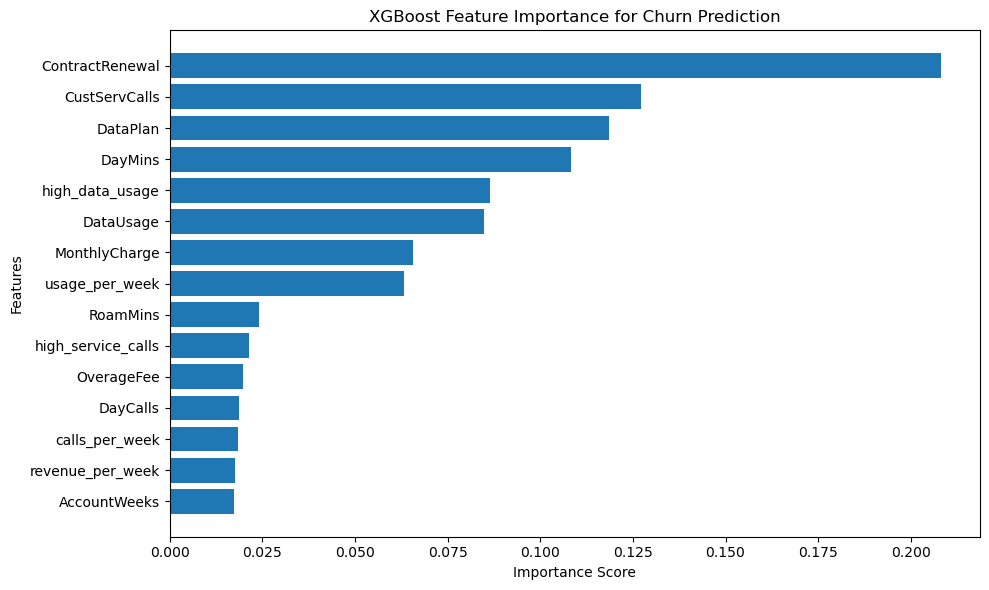

In [58]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance for Churn Prediction')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

In [59]:
print("\nTop 5 Most Important Features:")
print(importance_df.head())


Top 5 Most Important Features:
            Feature  Importance
1   ContractRenewal    0.208265
4     CustServCalls    0.127207
2          DataPlan    0.118571
5           DayMins    0.108199
13  high_data_usage    0.086544


Top Drivers of Churn:

ContractRenewal (20.8%)
* Customers not renewing contracts are much more likely to churn.
* Shows that focusion retention efforts on customers who are approaching the end of their contract is important.


CustServCalls (12.7%)
* High service calls could imply customer frustration.
* A possible solution could be to improve customer service quality or proactively reach out to customers with multiple complaints.


DataPlan (11.9%) 
* Could indicate engagement level or contract type.
* The Company could analyze if specific plan types are more prone to churn.


DayMins (10.8%) 
* Could indicate engagement level

high_data_usage (8.7%) 
* Shows that heavy users behave differently regarding churn.

In [61]:
from sklearn.metrics import confusion_matrix
xgb_pred = xgb_grid.predict(X_test)
cm = confusion_matrix(y_test, xgb_pred)
print("Confusion Matrix:")
print(cm)
print("\nBreakdown:")
print(f"True Negatives (Correctly predicted No Churn): {cm[0,0]}")
print(f"False Positives (Predicted Churn, Actually No Churn): {cm[0,1]}")
print(f"False Negatives (Predicted No Churn, Actually Churn): {cm[1,0]}")
print(f"True Positives (Correctly predicted Churn): {cm[1,1]}")

Confusion Matrix:
[[523  47]
 [ 31  66]]

Breakdown:
True Negatives (Correctly predicted No Churn): 523
False Positives (Predicted Churn, Actually No Churn): 47
False Negatives (Predicted No Churn, Actually Churn): 31
True Positives (Correctly predicted Churn): 66


In [62]:
import joblib
joblib.dump(xgb_grid.best_estimator_, 'churn_prediction_model.pkl')
print("Model saved as 'churn_prediction_model.pkl'")

Model saved as 'churn_prediction_model.pkl'
